In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Retrieving and Data Cleaning
df_apps = pd.read_csv("apps.csv")
df_reviews = pd.read_csv("user_reviews.csv")
df_apps["Category"] = df_apps["Category"].str.replace('_'," ")
df_apps["Rating"] = df_apps["Rating"].interpolate(method="linear")
df_apps["Size"] = df_apps["Size"].interpolate(method="linear")
df_apps["Current Ver"] = df_apps["Current Ver"].ffill()  
df_apps["Android Ver"] = df_apps["Android Ver"].bfill()
df_apps['Price'] = df_apps['Price'].replace('[+$]', '', regex=True).astype(float)
df_apps["Installs"] = df_apps["Installs"].replace('[+,]','',regex=True).astype(int)


### Which Category Of Free Applications Has Taken Over The Most Market Share (Top 15 Applications)?

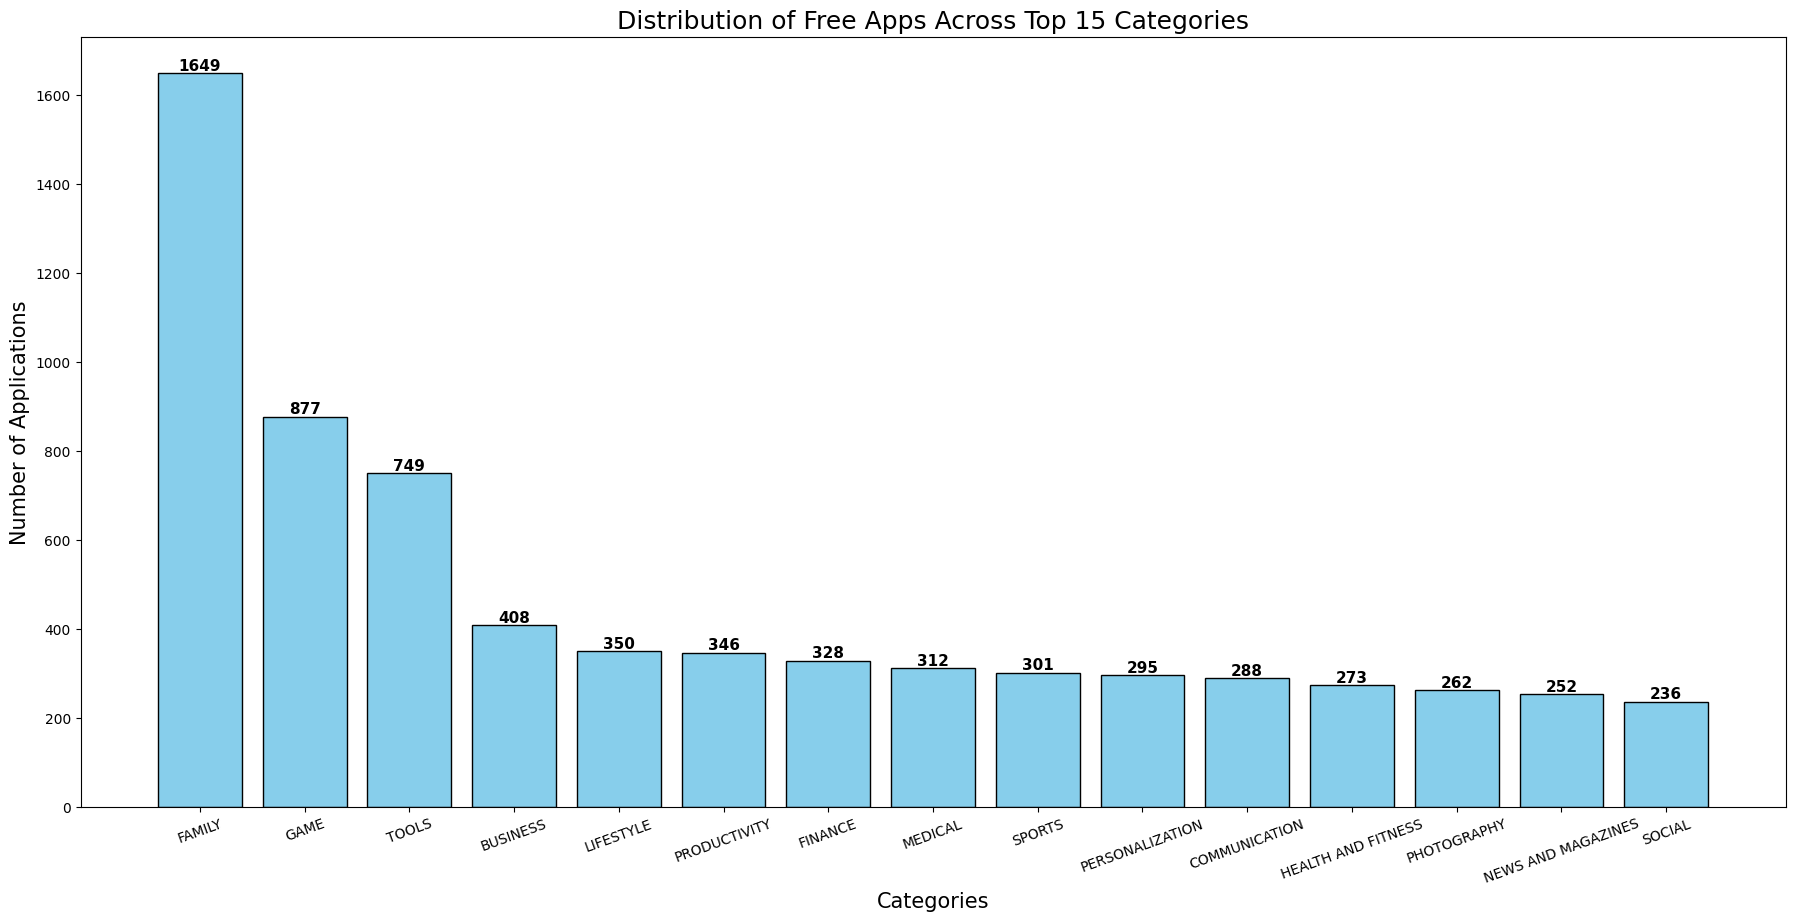

In [31]:
category = df_apps[df_apps["Type"]=="Free"]["Category"].value_counts().head(15)
app_categories = category.index
num_apps_in_category = category.values
plt.figure(figsize=[22,10])
bar1 = plt.bar(app_categories,num_apps_in_category, color='skyblue',edgecolor='black')
plt.xticks(np.arange(len(app_categories)),app_categories,rotation=20)
plt.xlabel("Categories",fontsize=15)
plt.ylabel("Number of Applications",fontsize=15)
plt.title("Distribution of Free Apps Across Top 15 Categories", fontsize=18)
def add_label(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
add_label(bar1)
plt.show()



### Distribution of app ratings?

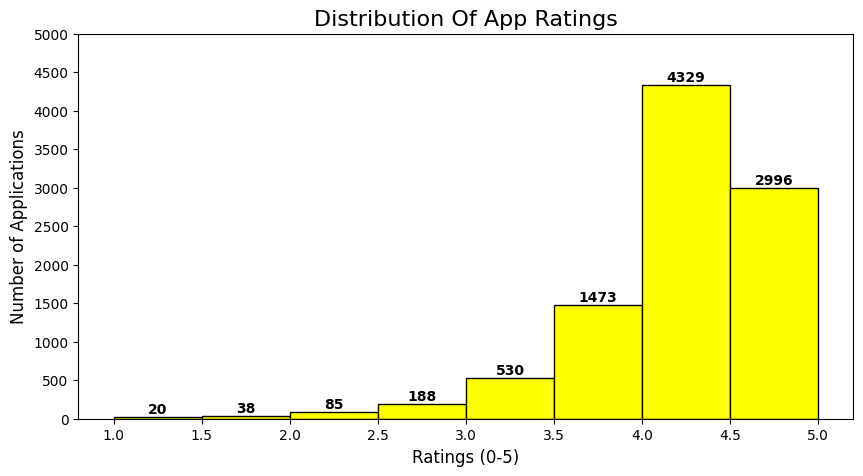

In [40]:
plt.figure(figsize=[10,5])
rating = df_apps["Rating"].values
counts, bins, patches = plt.hist(rating,bins=[1,1.5,2,2.5,3,3.5,4,4.5,5], color="yellow",edgecolor="black")
for count, bin_edge in zip(counts, bins[:-1]):  # Iterate over bars
    plt.text(bin_edge + 0.25, count + 50, str(int(count)), ha='center', fontsize=10, fontweight='bold')

plt.yticks(np.arange(0,5500,500))
plt.xlabel("Ratings (0-5)",fontsize=12)
plt.ylabel("Number of Applications",fontsize=12)
plt.title("Distribution Of App Ratings",fontsize=16)
plt.show()

### How does app size vary across different categories?

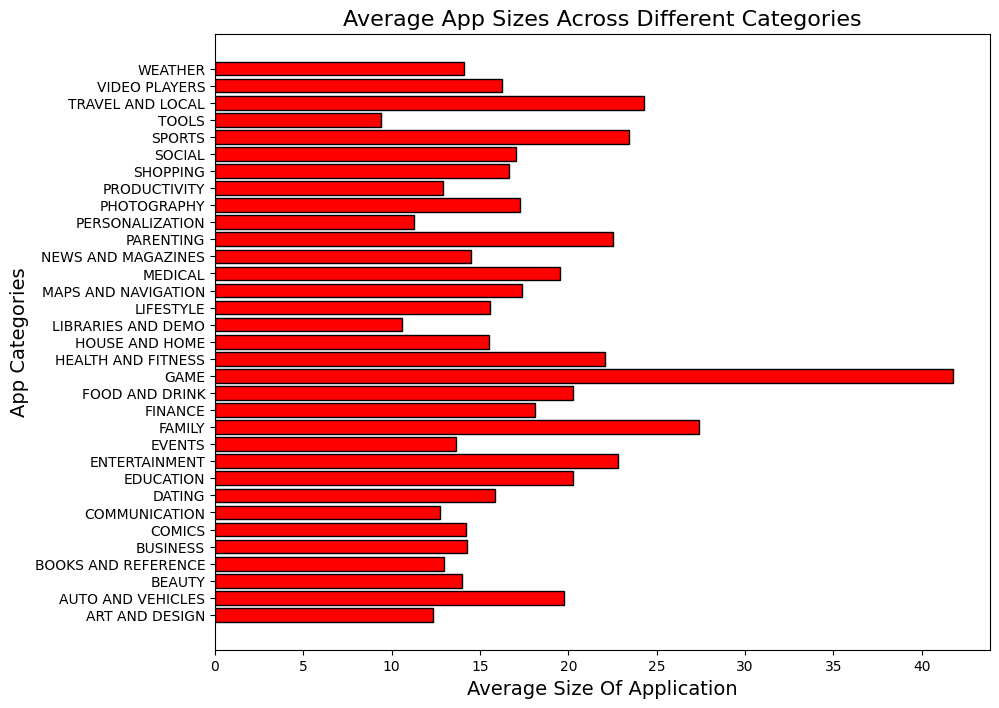

In [43]:
size_of_apps = df_apps.groupby("Category")["Size"].mean()
mean_sizes = size_of_apps.values
categories = size_of_apps.index
plt.figure(figsize=[10,8])
plt.barh(categories,mean_sizes,color='red',edgecolor='black')
plt.xlabel("Average Size Of Application",fontsize=14)
plt.ylabel("App Categories",fontsize=14)
plt.title("Average App Sizes Across Different Categories",fontsize=16)
plt.show()

### 

### Reviews(Positive, Neutral ,Negative ) Comparision Between Top 10 Applications

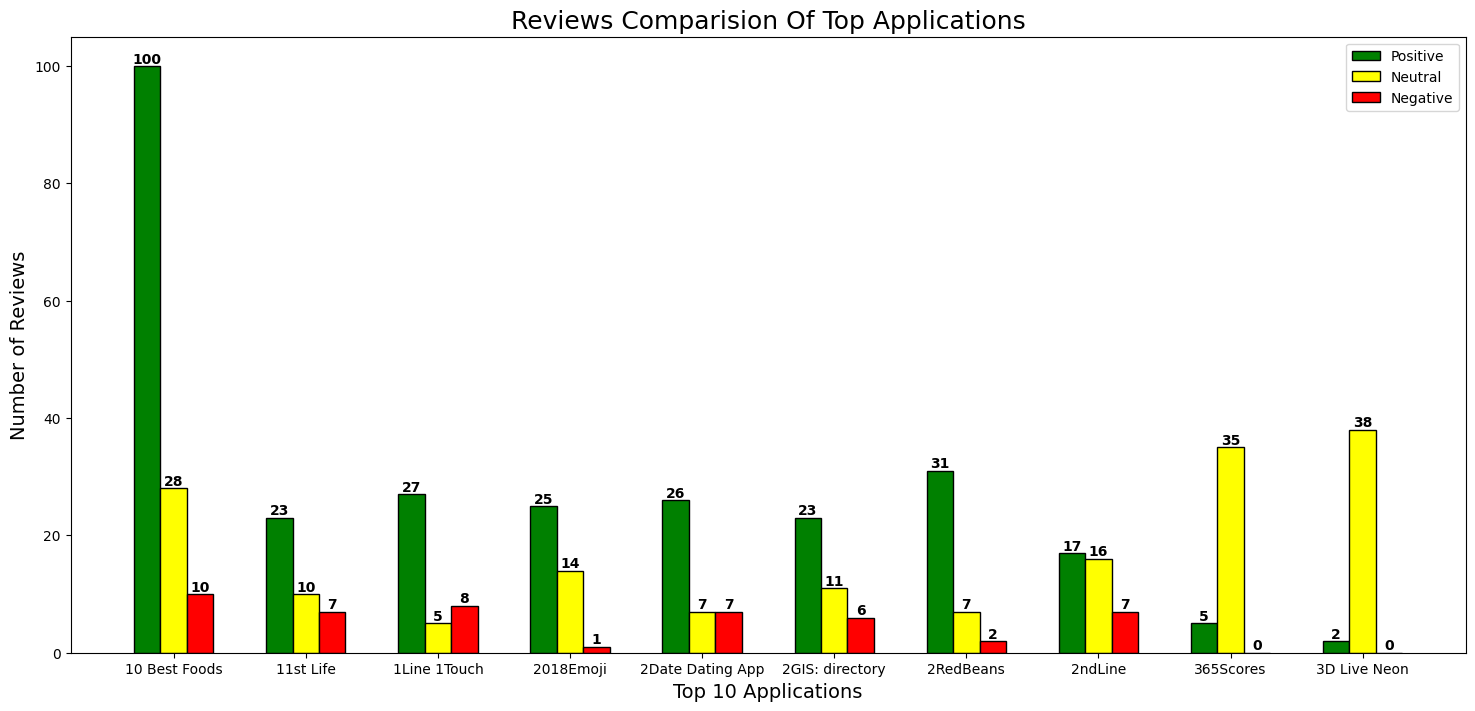

In [41]:

df_reviews["Sentiment_Polarity"] = pd.to_numeric(df_reviews["Sentiment_Polarity"], errors="coerce")
df_reviews["Sentiment_Subjectivity"] = pd.to_numeric(df_reviews["Sentiment_Subjectivity"], errors="coerce")

df_reviews.loc[df_reviews["Sentiment_Polarity"].isna(), "Sentiment_Polarity"] = df_reviews["Sentiment_Polarity"].mean()
df_reviews.loc[df_reviews["Sentiment_Subjectivity"].isna(), "Sentiment_Subjectivity"] = df_reviews["Sentiment_Subjectivity"].mean()

df_reviews["Sentiment"] = df_reviews["Sentiment"].fillna("Neutral")
most_common_review = df_reviews["Review"].mode()[0]
df_reviews["Review"] = df_reviews["Review"].fillna(most_common_review)

apps = df_reviews[df_reviews["Sentiment_Polarity"]==1]["App"].unique()
top_apps = np.sort(apps)[0:10]
sentiment_counts = df_reviews.groupby(["App", "Sentiment"]).size().unstack()
sentiment_counts.loc["10 Best Foods for You","Positive"] = 100.0
filtered_sentiments = sentiment_counts.loc[top_apps]
filtered_sentiments.fillna(0,inplace=True)
x = np.arange(len(filtered_sentiments))
width = 0.2
plt.figure(figsize=[18,8])
bar1 = plt.bar(x - 0.2,filtered_sentiments["Positive"],width,color='green',edgecolor='black',label="Positive")
bar2 = plt.bar(x ,filtered_sentiments["Neutral"],width,color='yellow',edgecolor='black',label="Neutral")
bar3 = plt.bar(x + 0.2,filtered_sentiments["Negative"],width,color='red',edgecolor='black',label="Negative")

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

top_apps = [app.split()[0] for app in top_apps]
top_apps[0] = "10 Best Foods"
top_apps[9] = "3D Live Neon"
top_apps[1] = "11st Life"
top_apps[2] = "1Line 1Touch"
top_apps[4] = "2Date Dating App"
top_apps[5] = "2GIS: directory"

plt.xlabel("Top 10 Applications",fontsize = 14)
plt.ylabel("Number of Reviews",fontsize=14)
plt.title("Reviews Comparision Of Top Applications",fontsize=18)
plt.xticks(x,top_apps)
plt.legend()
plt.show()

### What is the correlation between an app's price and its rating?

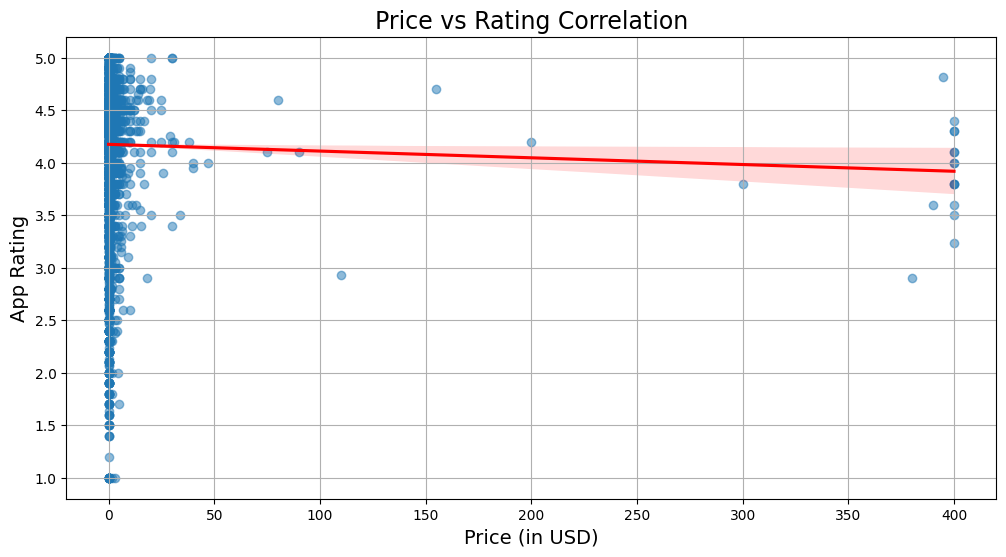

In [29]:
correlation = df_apps["Price"].corr(df_apps["Rating"])
plt.figure(figsize=(12, 6))
sns.regplot(x=df_apps["Price"], y=df_apps["Rating"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xlabel("Price (in USD)",fontsize = 14)
plt.ylabel("App Rating",fontsize=14)
plt.title("Price vs Rating Correlation",fontsize=17)
plt.grid(True)
